# Testing the Full, Last Layer and Subnetwork functionality

### Model training

In [1]:
import Pkg
Pkg.activate("../../../")

  Activating project at `c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl`


In [2]:
using Flux
using Flux: gradient
using LaplaceRedux
using LinearAlgebra
using Plots
using Statistics
using Zygote
using Flux.Optimise: update!, Adam

In [3]:
xs, ys = LaplaceRedux.Data.toy_data_non_linear(200)
X = hcat(xs...) # bring into tabular format
data = zip(xs,ys)

zip([[4.462090709396719, 4.311163866767086], [1.6519893775640773, 1.2483219916114596], [3.3346447727862394, 4.677256116396117], [2.618534752925896, 0.8180969617259748], [4.269982179373849, 1.0960578272048087], [2.4216641426668093, 3.2590384811511037], [3.899355972203371, 2.474238285880686], [2.6710561360166323, 4.451011861785263], [3.9062074004773524, 4.084254332975006], [1.8666954070892305, 3.822398333518322]  …  [-2.11499418410071, 2.5585454091541635], [-0.5845938853738701, 1.9914488106558954], [-4.728854657677866, 3.764248247246751], [-1.057364935441631, 4.711840707679499], [-2.469738171384399, 4.63253906214922], [-1.3527855300554519, 2.221324817067052], [-2.0291240995404887, 3.7050791385277098], [-3.8785255797554776, 3.1674905992302893], [-4.227322285407752, 4.450009036985588], [-4.783690491665517, 4.388930470942862]], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [4]:
n_hidden = 10
D = size(X,1)
nn = Chain(
    Dense(D, n_hidden, σ),
    Dense(n_hidden, 1)
)
loss(x, y) = Flux.Losses.logitbinarycrossentropy(nn(x), y) 

loss (generic function with 1 method)

In [5]:
opt = Adam(1e-3)
epochs = 100
avg_loss(data) = mean(map(d -> loss(d[1],d[2]), data))
show_every = epochs/10

for epoch = 1:epochs
  for d in data
    gs = gradient(Flux.params(nn)) do
      l = loss(d...)
    end
    update!(opt, Flux.params(nn), gs)
  end
  if epoch % show_every == 0
    println("Epoch " * string(epoch))
    @show avg_loss(data)
  end
end

┌ Warning: Layer with Float32 parameters got Float64 input.
│   The input will be converted, but any earlier layers may be very slow.
│   layer = Dense(2 => 10, σ)
│   summary(x) = 2-element Vector{Float64}
└ @ Flux C:\Users\adeli\.julia\packages\Flux\EHgZm\src\layers\stateless.jl:60


Epoch 10


avg_loss(data) = 0.6645276088267564


Epoch 20
avg_loss(data) = 0.5751277409866452


Epoch 30
avg_loss(data) = 0.44230422616004944


Epoch 40
avg_loss(data) = 0.31274151846766474


Epoch 50
avg_loss(data) = 0.21866450011730193


Epoch 60
avg_loss(data) = 0.15749053510837258


Epoch 70
avg_loss(data) = 0.1181586649781093


Epoch 80
avg_loss(data) = 0.09218362588901073


Epoch 90
avg_loss(data) = 0.07435111598693765


Epoch 100
avg_loss(data) = 0.061612051161937416


### LA for Full Neural Network

┌ Info: Iteration 50: P₀=0.0760889786490975, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358


loss(exp.(logP₀), exp.(logσ)) = 46.40940991199821
Log likelihood: -12.322410232387483
Log det ratio: 53.147857237188255
Scatter: 15.026142122033203
loss(exp.(logP₀), exp.(logσ)) = 46.38891867471436
Log likelihood: -12.322410232387483
Log det ratio: 54.40806709592336
Scatter: 13.724949788730392
loss(exp.(logP₀), exp.(logσ)) = 46.3877814846464
Log likelihood: -12.322410232387483
Log det ratio: 54.164537640687044
Scatter: 13.966204863830797


┌ Info: Iteration 100: P₀=0.06950003553495834, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 150: P₀=0.0707216965647302, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358


loss(exp.(logP₀), exp.(logσ)) = 46.38778103226597
Log likelihood: -12.322410232387483
Log det ratio: 54.168931299076675
Scatter: 13.9618103006803
loss(exp.(logP₀), exp.(logσ)) = 46.387781029639
Log likelihood: -12.322410232387483
Log det ratio: 54.16934068070214
Scatter: 13.961400913800901
loss(exp.(logP₀), exp.(logσ)) = 46.387781029598344
Log likelihood: -12.322410232387483
Log det ratio: 54.169292782718294
Scatter: 13.96144881170343
loss(exp.(logP₀), exp.(logσ)) = 46.38778102959817
Log likelihood: -12.322410232387483
Log det ratio: 54.16929568531238
Scatter: 13.961445909108996


┌ Info: Iteration 200: P₀=0.07069944349278301, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 250: P₀=0.07069737045039641, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 300: P₀=0.07069761299452074, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 350: P₀=0.07069759829644028, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358


loss(exp.(logP₀), exp.(logσ)) = 46.38778102959817
Log likelihood: -12.322410232387483
Log det ratio: 54.16929564502568
Scatter: 13.961445949395696
loss(exp.(logP₀), exp.(logσ)) = 46.38778102959815
Log likelihood: -12.322410232387483
Log det ratio: 54.169295627609614
Scatter: 13.961445966811723
loss(exp.(logP₀), exp.(logσ)) = 46.3877810295982
Log likelihood: -12.322410232387483
Log det ratio: 54.169295630161436
Scatter: 13.961445964260001
...


┌ Info: Iteration 400: P₀=0.07069759850044299, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 450: P₀=0.07069759858863384, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 500: P₀=0.07069759857571249, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358


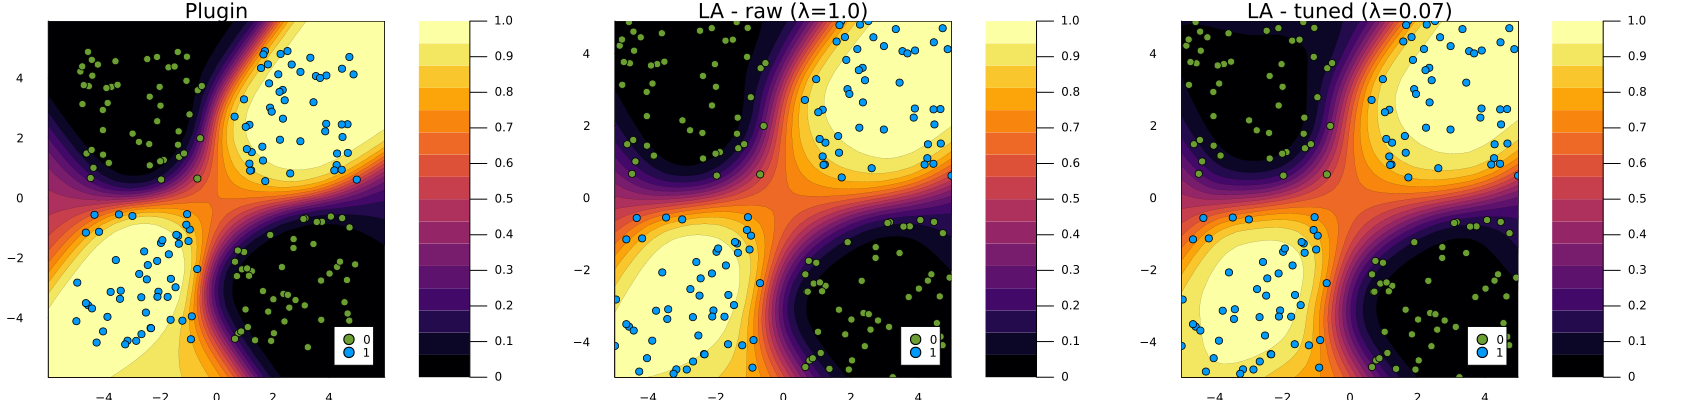

In [6]:
function fit_la_full_network(nn, data, X, ys)
    la = Laplace(nn; likelihood=:classification, subset_of_weights=:all)
    fit!(la, data)
    plot(la, X, ys)
end

la = Laplace(nn; likelihood=:classification, subset_of_weights=:all)
fit!(la, data)

la_untuned = deepcopy(la)   # saving for plotting
optimize_prior!(la; verbose=true, n_steps=500)

zoom=0
println("...")
p_plugin = plot(la, X, ys; title="Plugin", link_approx=:plugin, clim=(0,1))
p_untuned = plot(la_untuned, X, ys; title="LA - raw (λ=$(unique(diag(la_untuned.P₀))[1]))", clim=(0,1), zoom=zoom)
p_laplace = plot(la, X, ys; title="LA - tuned (λ=$(round(unique(diag(la.prior.P₀))[1],digits=2)))", clim=(0,1), zoom=zoom)
plot(p_plugin, p_untuned, p_laplace, layout=(1,3), size=(1700,400))

### LA for Last Layer of Neural Network

loss(exp.(logP₀), exp.(logσ)) = 23.890722336680597
Log likelihood: -12.322410232387483
Log det ratio: 17.980991548524813
Scatter: 5.155632660061415
loss(exp.(logP₀), exp.(logσ)) = 23.884271714341104
Log likelihood: -12.322410232387483
Log det ratio: 18.40863016374943
Scatter: 4.7150928001578105
loss(exp.(logP₀), exp.(logσ)) = 23.883918118733543
Log likelihood: -12.322410232387483
Log det ratio: 18.327464182755918
Scatter: 4.795551589936201
loss(exp.(logP₀), exp.(logσ)) = 23.883918097006624
Log likelihood: -12.322410232387483
Log det ratio: 18.327906953555104
Scatter: 4.795108775683178
loss(exp.(logP₀), exp.(logσ)) = 23.88391809424909
Log likelihood: -12.322410232387483
Log det ratio: 18.328156093308003
Scatter: 4.794859630415206
loss(exp.(logP₀), exp.(logσ)) = 23.883918094218142
Log likelihood: -12.322410232387483
Log det ratio: 18.32813053504251
Scatter: 4.794885188618805
loss(exp.(logP₀), exp.(logσ)) = 23.883918094217975
Log likelihood: -12.322410232387483
Log det ratio: 18.328132387

┌ Info: Iteration 50: P₀=0.0776020707539622, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 100: P₀=0.0709711085360735, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 150: P₀=0.07218216624884052, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 200: P₀=0.07217550105268329, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 250: P₀=0.0721717509428543, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 300: P₀=0.0721721356423965, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd


loss(exp.(logP₀), exp.(logσ)) = 23.883918094217968
Log likelihood: -12.322410232387483
Log det ratio: 18.328132289077818
Scatter: 4.794883434583157
...


┌ Info: Iteration 500: P₀=0.07217210924082611, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358


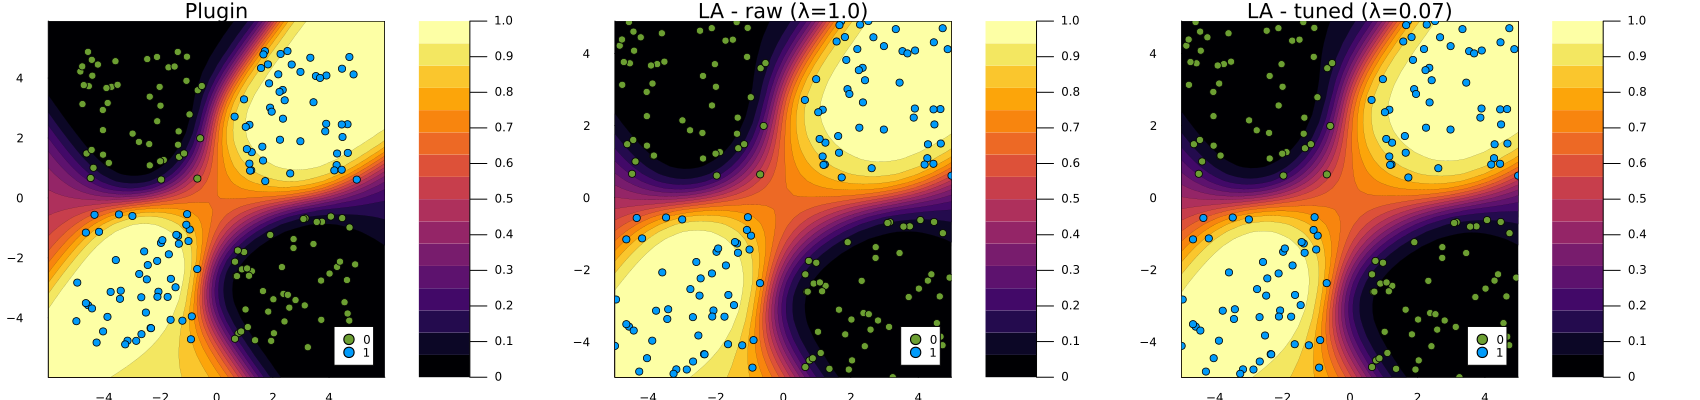

In [7]:
function fit_la_last_layer(nn, data, X, ys)
    la = Laplace(nn; likelihood=:classification, subset_of_weights=:last_layer)
    fit!(la, data)
    plot(la, X, ys)
end

la = Laplace(nn; likelihood=:classification, subset_of_weights=:last_layer)
fit!(la, data)

la_untuned = deepcopy(la)   # saving for plotting
optimize_prior!(la; verbose=true, n_steps=500)

zoom=0
println("...")
p_plugin = plot(la, X, ys; title="Plugin", link_approx=:plugin, clim=(0,1))
p_untuned = plot(la_untuned, X, ys; title="LA - raw (λ=$(unique(diag(la_untuned.P₀))[1]))", clim=(0,1), zoom=zoom)
p_laplace = plot(la, X, ys; title="LA - tuned (λ=$(round(unique(diag(la.prior.P₀))[1],digits=2)))", clim=(0,1), zoom=zoom)
plot(p_plugin, p_untuned, p_laplace, layout=(1,3), size=(1700,400))

### LA for Subset of Neural Network

Looking at the plot for tuned Laplace, by selecting just 4 of the 41 weights in the neural network provided in this notebook, we can see that there is not much information from the gradients and the jacobian that Laplace Approximation can use in order to adjust its predictive uncertainty.

loss(exp.(logP₀), exp.(logσ)) = 16.055709623657307
Log likelihood: -12.322410232387483
Log det ratio: 5.5793119979254655
Scatter: 1.8872867846141796
loss(exp.(logP₀), exp.(logσ)) = 16.037623938911153
Log likelihood: -12.322410232387483
Log det ratio: 5.173145574397843
Scatter: 2.257281838649494
loss(exp.(logP₀), exp.(logσ)) = 16.037552453865164
Log likelihood: -12.322410232387483
Log det ratio: 5.195004460909107
Scatter: 2.2352799820462566
loss(exp.(logP₀), exp.(logσ)) = 16.037552263951426
Log likelihood: -12.322410232387483
Log det ratio: 5.196263151101146
Scatter: 2.2340209120267436
loss(exp.(logP₀), exp.(logσ)) = 16.037552263354556
Log likelihood: -12.322410232387483
Log det ratio: 5.196205633817282
Scatter: 2.2340784281168595
loss(exp.(logP₀), exp.(logσ)) = 16.037552263341485
Log likelihood: -12.322410232387483
Log det ratio: 5.196196529633754
Scatter: 2.234087532274249
loss(exp.(logP₀), exp.(logσ)) = 16.0375522633414
Log likelihood: -12.322410232387483
Log det ratio: 5.19619578766

┌ Info: Iteration 50: P₀=0.12992857275363504, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 100: P₀=0.15540055172822428, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 150: P₀=0.15388585356486423, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 200: P₀=0.15379917401411136, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 250: P₀=0.15380313365795564, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 300: P₀=0.15380376042553826, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate


loss(exp.(logP₀), exp.(logσ)) = 16.0375522633414
Log likelihood: -12.322410232387483
Log det ratio: 5.196195733668924
Scatter: 2.2340883282389083
loss(exp.(logP₀), exp.(logσ)) = 16.0375522633414
Log likelihood: -12.322410232387483
Log det ratio: 5.196195733718001
Scatter: 2.2340883281898307
...


┌ Info: Iteration 450: P₀=0.15380381522301423, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 500: P₀=0.15380381521963551, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358


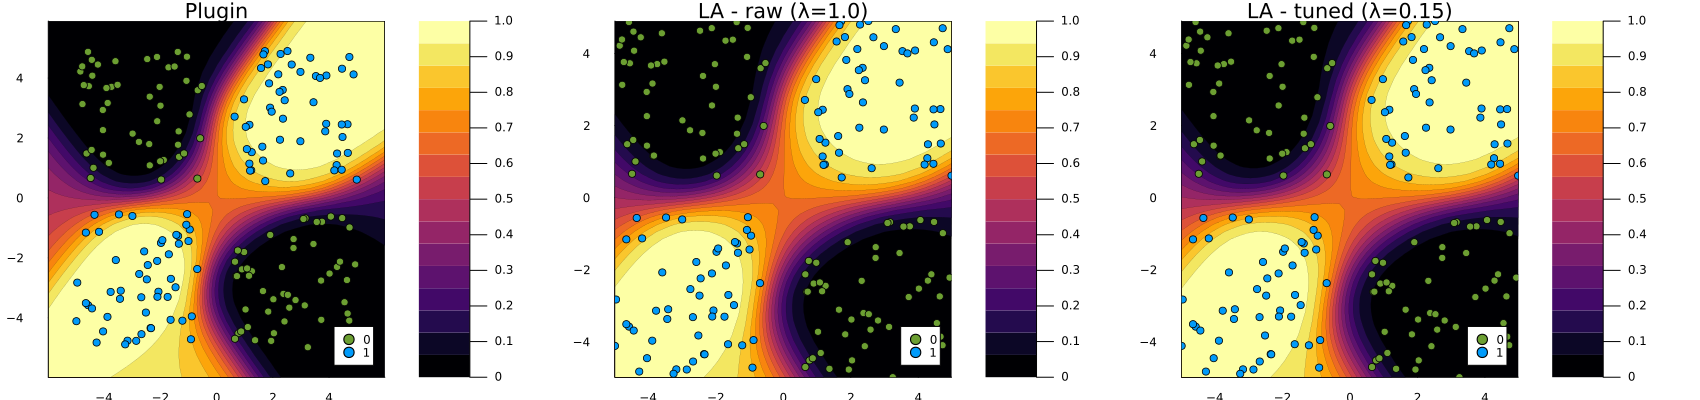

In [8]:
function fit_la_subnetwork(nn, data, X, ys)
    la = Laplace(nn; likelihood=:classification, subset_of_weights=:subnetwork, subnetwork_indices=[[3, 1, 1], [2, 8], [2, 9], [2, 10]])
    fit!(la, data)
    plot(la, X, ys)
end

la = Laplace(nn; likelihood=:classification, subset_of_weights=:subnetwork, subnetwork_indices=[[3, 1, 1], [2, 8], [2, 9], [2, 10]])
fit!(la, data)

la_untuned = deepcopy(la)   # saving for plotting
optimize_prior!(la; verbose=true, n_steps=500)

zoom=0
println("...")
p_plugin = plot(la, X, ys; title="Plugin", link_approx=:plugin, clim=(0,1))
p_untuned = plot(la_untuned, X, ys; title="LA - raw (λ=$(unique(diag(la_untuned.P₀))[1]))", clim=(0,1), zoom=zoom)
p_laplace = plot(la, X, ys; title="LA - tuned (λ=$(round(unique(diag(la.prior.P₀))[1],digits=2)))", clim=(0,1), zoom=zoom)
plot(p_plugin, p_untuned, p_laplace, layout=(1,3), size=(1700,400))

When providing all 41 weights, the uncertainties are visibly higher.

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41]
loss(exp.(logP₀), exp.(logσ)) = 46.40940991199821
Log likelihood: -12.322410232387483
Log det ratio: 53.147857237188255
Scatter: 15.026142122033203
loss(exp.(logP₀), exp.(logσ)) = 

┌ Info: Iteration 50: P₀=0.0760889786490975, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 100: P₀=0.06950003553495834, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358


46.38891867471436
Log likelihood: -12.322410232387483
Log det ratio: 54.40806709592336
Scatter: 13.724949788730392
loss(exp.(logP₀), exp.(logσ)) = 46.3877814846464
Log likelihood: -12.322410232387483
Log det ratio: 54.164537640687044
Scatter: 13.966204863830797
loss(exp.(logP₀), exp.(logσ)) = 46.38778103226597
Log likelihood: -12.322410232387483
Log det ratio: 54.168931299076675
Scatter: 13.9618103006803
loss(exp.(logP₀), exp.(logσ)) = 46.387781029639
Log likelihood: -12.322410232387483
Log det ratio: 54.16934068070214
Scatter: 13.961400913800901

┌ Info: Iteration 150: P₀=0.0707216965647302, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 200: P₀=0.07069944349278301, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 250: P₀=0.07069737045039641, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358



loss(exp.(logP₀), exp.(logσ)) = 46.387781029598344
Log likelihood: -12.322410232387483
Log det ratio: 54.169292782718294
Scatter: 13.96144881170343
loss(exp.(logP₀), exp.(logσ)) = 46.38778102959817
Log likelihood: -12.322410232387483
Log det ratio: 54.16929568531238
Scatter: 13.961445909108996
loss(exp.(logP₀), exp.(logσ)) = 46.38778102959817
Log likelihood: -12.322410232387483
Log det ratio: 54.16929564502568
Scatter: 13.961445949395696
loss(exp.(logP₀), exp.(logσ)) = 46.38778102959815
Log likelihood: -12.322410232387483
Log det ratio: 54.169295627609614
Scatter: 13.961445966811723
loss(exp.(logP₀), exp.(logσ)) = 46.3877810295982
Log likelihood: -12.322410232387483
Log det ratio: 54.169295630161436
Scatter: 13.961445964260001
...

┌ Info: Iteration 300: P₀=0.07069761299452074, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 350: P₀=0.07069759829644028, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 400: P₀=0.07069759850044299, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 450: P₀=0.07069759858863384, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358
┌ Info: Iteration 500: P₀=0.07069759857571249, σ=1.0
└ @ LaplaceRedux c:\Users\adeli\OneDrive\Desktop\facultate\2nd year\Q4 - Software Project\LaplaceRedux.jl\src\laplace.jl:358


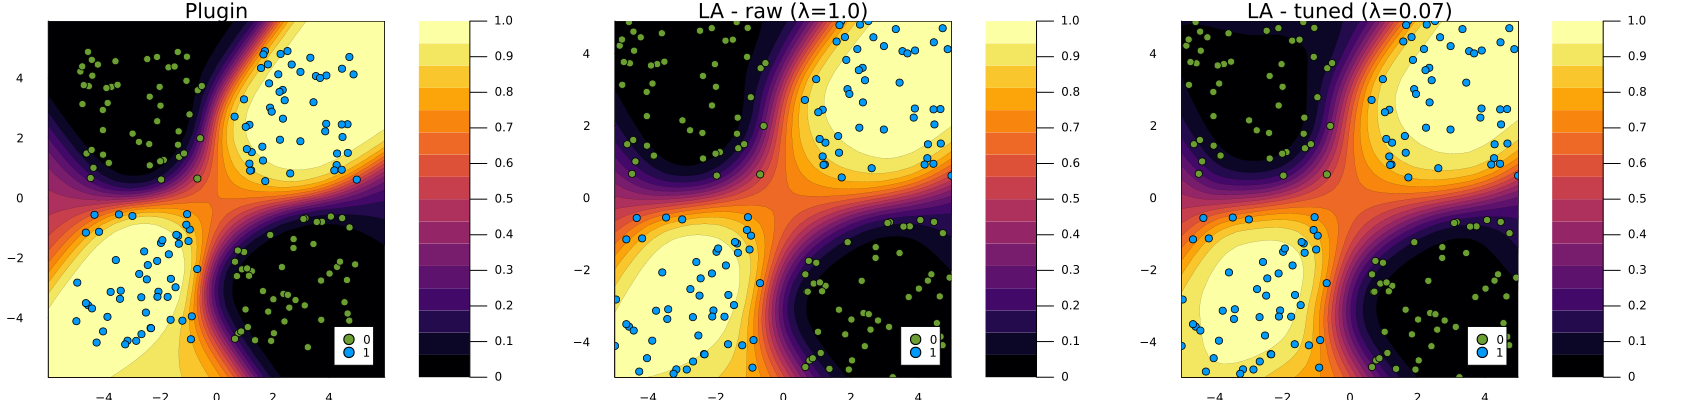

In [9]:
la = Laplace(nn; likelihood=:classification, subset_of_weights=:subnetwork, subnetwork_indices=[[1, 1, 1], [1, 1, 2], [1, 2, 1], [1, 2, 2], [1, 3, 1], [1, 3, 2], [1, 4, 1], [1, 4, 2], [1, 5, 1], [1, 5, 2], [1, 6, 1], [1, 6, 2], [1, 7, 1], [1, 7, 2], [1, 8, 1], [1, 8, 2], [1, 9, 1], [1, 9, 2], [1, 10, 1], [1, 10, 2], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [2, 9], [2, 10], [3, 1, 1], [3, 1, 2], [3, 1, 3], [3, 1, 4], [3, 1, 5], [3, 1, 6], [3, 1, 7], [3, 1, 8], [3, 1, 9], [3, 1, 10], [4, 1]])
println(la.est_params.curvature.subnetwork_indices)
fit!(la, data)

la_untuned = deepcopy(la)   # saving for plotting
optimize_prior!(la; verbose=true, n_steps=500)

zoom=0
println("...")
p_plugin = plot(la, X, ys; title="Plugin", link_approx=:plugin, clim=(0,1))
p_untuned = plot(la_untuned, X, ys; title="LA - raw (λ=$(unique(diag(la_untuned.P₀))[1]))", clim=(0,1), zoom=zoom)
p_laplace = plot(la, X, ys; title="LA - tuned (λ=$(round(unique(diag(la.prior.P₀))[1],digits=2)))", clim=(0,1), zoom=zoom)
plot(p_plugin, p_untuned, p_laplace, layout=(1,3), size=(1700,400))

In [12]:
using BenchmarkTools

In [24]:
@benchmark fit_la_full_network(nn, data, X, ys)

BenchmarkTools.Trial: 14 samples with 1 evaluation.
 Range (min … max):  331.768 ms … 459.428 ms  ┊ GC (min … max): 2.99% … 2.63%
 Time  (median):     382.782 ms               ┊ GC (median):    3.17%
 Time  (mean ± σ):   381.004 ms ±  32.842 ms  ┊ GC (mean ± σ):  3.70% ± 1.40%

  ▁   ▁     █ ▁         ▁▁▁  ▁  ▁▁▁    ▁                      ▁  
  █▁▁▁█▁▁▁▁▁█▁█▁▁▁▁▁▁▁▁▁███▁▁█▁▁███▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  332 ms           Histogram: frequency by time          459 ms <

 Memory estimate: 161.79 MiB, allocs estimate: 586070.

In [25]:
@benchmark fit_la_last_layer(nn, data, X, ys)

BenchmarkTools.Trial: 27 samples with 1 evaluation.
 Range (min … max):  172.030 ms … 218.403 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     188.194 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   189.343 ms ±  11.992 ms  ┊ GC (mean ± σ):  3.01% ± 3.37%

  █   ▁▁█▁      ▁ █▁█  █  █  ▁  █▁ ▁  ▁   ▁▁               ▁  ▁  
  █▁▁▁████▁▁▁▁▁▁█▁███▁▁█▁▁█▁▁█▁▁██▁█▁▁█▁▁▁██▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁█ ▁
  172 ms           Histogram: frequency by time          218 ms <

 Memory estimate: 59.42 MiB, allocs estimate: 580696.

In [26]:
@benchmark fit_la_subnetwork(nn, data, X, ys)

BenchmarkTools.Trial: 26 samples with 1 evaluation.
 Range (min … max):  164.144 ms … 249.522 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     188.059 ms               ┊ GC (median):    0.00%
 Time  (mean ± σ):   195.716 ms ±  21.051 ms  ┊ GC (mean ± σ):  2.97% ± 3.97%

           █     ▄ ▁     ▁          ▁▁                           
  ▆▁▆▁▁▁▁▁▁█▁▁▁▆▆█▆█▁▁▁▁▆█▁▆▁▆▁▁▁▁▁▁██▁▁▆▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▆▁▆ ▁
  164 ms           Histogram: frequency by time          250 ms <

 Memory estimate: 46.66 MiB, allocs estimate: 591510.